<a href="https://colab.research.google.com/github/MattLeRoi/new_project/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank

Dataset information -
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means 
client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [2]:
# !pip install lightgbm
# !pip install catboost
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgbm
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier, Pool

import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


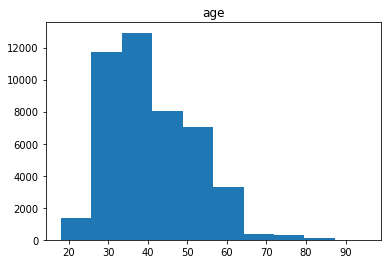

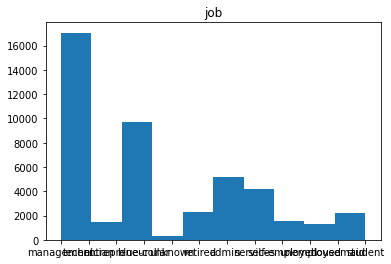

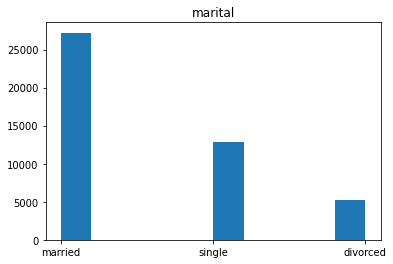

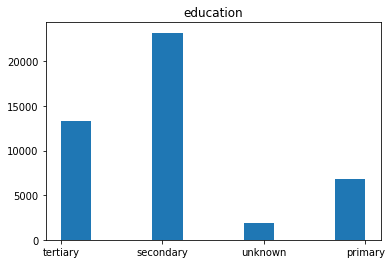

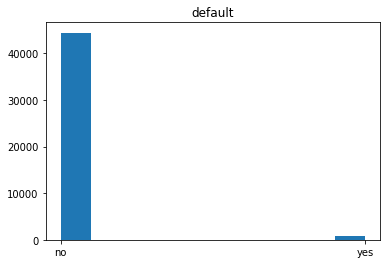

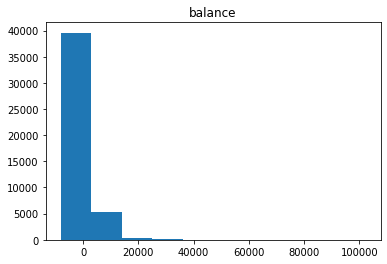

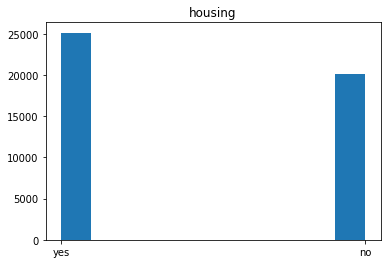

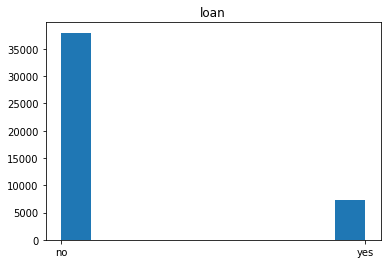

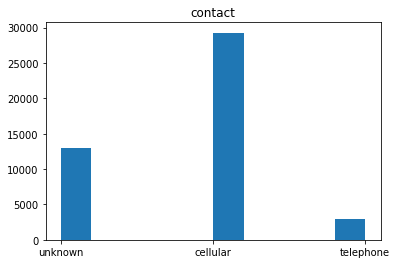

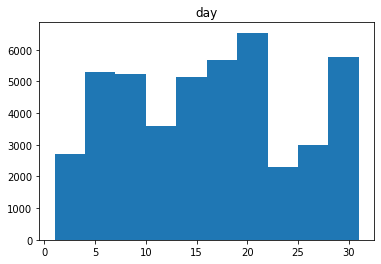

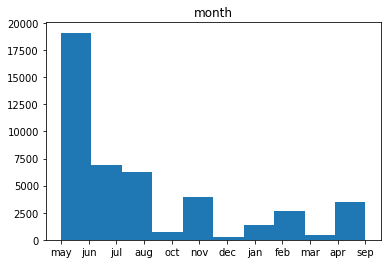

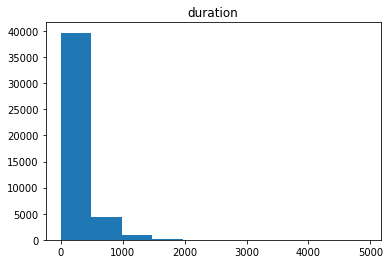

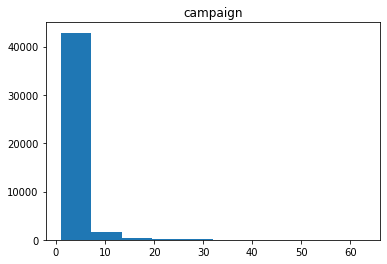

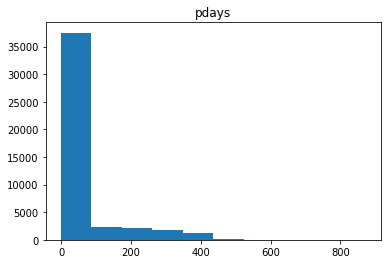

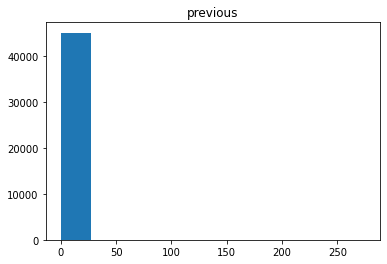

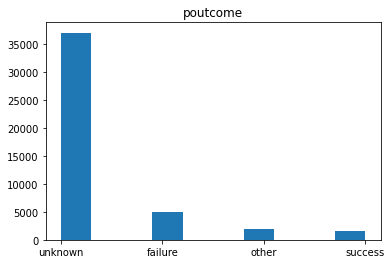

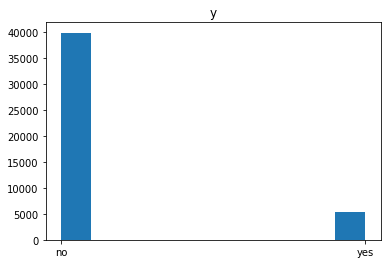

In [4]:
for col in df.columns:
    plt.figure()
    plt.title(col)
    plt.hist(df[col]);

In [5]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [6]:
X=df.drop(['y','pdays'], axis=1) # The -1 in pdays throws off the math. previous also functions as a flag for previously contacted
y = [1 if target_y_n == "yes" else 0 for target_y_n in df['y']]

In [7]:
categorical_features = ['day','job','marital','education','default','housing','loan','contact','month','poutcome']

X_encoded = pd.get_dummies(X, columns=categorical_features)
X_encoded

,age,balance,duration,campaign,previous,day_1,day_2,day_3,day_4,day_5,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1,44,29,151,1,0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,33,2,76,1,0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,47,1506,92,1,0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
4,33,1,198,1,0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45207,71,1729,456,2,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
45208,72,5715,1127,5,3,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
45209,57,668,508,4,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [8]:
X_all_training,X_test,y_all_training,y_test = train_test_split(X_encoded,y,random_state=42, test_size=.15) # 15% test set
X_train_raw,X_val_raw,y_train,y_val = train_test_split(X_all_training,y_all_training,random_state=42, test_size=.1/.85) # 10% validation set
X_val_raw

,age,balance,duration,campaign,previous,day_1,day_2,day_3,day_4,day_5,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
360,48,263,350,2,0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
18751,43,5048,214,3,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
15173,34,1,54,3,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
20787,41,1545,183,2,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4517,33,163,135,1,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,31,360,395,1,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
37591,33,283,40,1,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
642,37,240,246,1,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1718,22,2412,238,2,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [9]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_raw), columns=X_encoded.columns)
X_val = pd.DataFrame(scaler.transform(X_val_raw), columns=X_encoded.columns)

In [10]:
roc_results = pd.DataFrame(columns=['Model','Score'])
imp_factors = pd.DataFrame(columns=['LogisticRegression','DecisionTreeClassifier', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier'])
def add_score (roc_results,model_name):
    y_pred = model_name.predict(X_val)
    y_proba = model_name.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, y_proba)
    print("ROC-AUC:", score)
    new_row_data = {'Model':model_name, 'Score':score}
    roc_results.loc[len(roc_results)] = new_row_data
    return roc_results

### Logistic Regression

In [11]:
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

add_score(roc_results,log_reg)

# y_pred = log_reg.predict(X_val)
# y_proba = log_reg.predict_proba(X_val)[:, 1]
# score = roc_auc_score(y_val, y_proba)
# print("ROC-AUC:", score)

ROC-AUC: 0.9114035913672226


,Model,Score
0,LogisticRegression(max_iter=5000),0.911404


In [12]:
# model_list += 'LogisticRegression'
# roc_scores += score

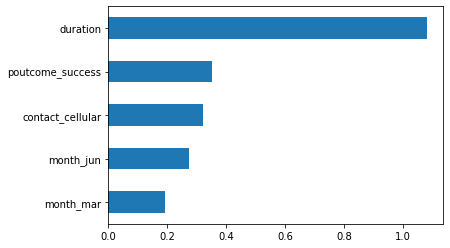

In [13]:
coefs = pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False).head(5).sort_values(ascending=True)
coefs.plot(kind='barh');
imp_factors['LogisticRegression']=coefs.sort_values(ascending=False).head(5).index

### Random Forest

In [14]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_proba = rf.predict_proba(X_val)[:, 1]

add_score(roc_results,rf)

# score = roc_auc_score(y_val, y_proba)
# print("ROC-AUC:", score)

ROC-AUC: 0.9291010008278114


,Model,Score
0,LogisticRegression(max_iter=5000),0.911404
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.929101


In [15]:
# model_list += 'RandomForest'
# roc_scores += score

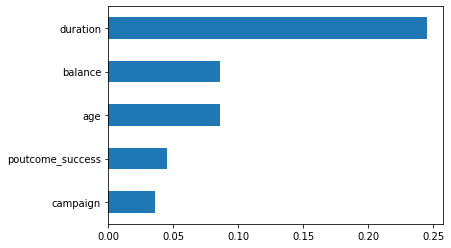

In [16]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(5).sort_values(ascending=True).plot(kind='barh');
imp_factors['DecisionTreeClassifier']=importances.sort_values(ascending=False).head(5).index

### XGBoost

In [17]:
xgb_model = XGBClassifier(
#     n_estimators=200,
#     learning_rate=0.1,
#     max_depth=4,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

add_score(roc_results,xgb_model)

# y_pred = xgb_model.predict(X_val)
# y_proba = xgb_model.predict_proba(X_val)[:, 1]

# score = roc_auc_score(y_val, y_proba)
# print("ROC-AUC:", score)

ROC-AUC: 0.9313220656834935


,Model,Score
0,LogisticRegression(max_iter=5000),0.911404
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.929101
2,"XGBClassifier(base_score=None, booster=None, c...",0.931322


In [18]:
# model_list += 'RandomForest'
# roc_scores += score

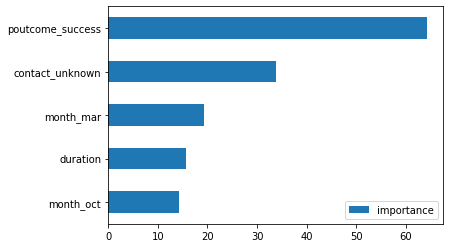

In [19]:
importance = xgb_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({'importance':list(importance.values())}, index=importance.keys())

importances=importance_df.sort_values(by='importance', ascending=True).tail(5)
importances.plot(kind='barh');
imp_factors['XGBClassifier']=importances.sort_values(by='importance',ascending=False).head(5).index

### Light GBM

In [20]:
lgbm_model = LGBMClassifier(
#     n_estimators=200,
#     learning_rate=0.1,
#     max_depth=-1,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

add_score(roc_results,lgbm_model)

# y_pred = lgbm_model.predict(X_val)
# y_proba = lgbm_model.predict_proba(X_val)[:, 1]

# score = roc_auc_score(y_val, y_proba)
# print("ROC-AUC:", score)

[LightGBM] [Info] Number of positive: 3969, number of negative: 29938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 33907, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117055 -> initscore=-2.020614
[LightGBM] [Info] Start training from score -2.020614
ROC-AUC: 0.933431317161588


,Model,Score
0,LogisticRegression(max_iter=5000),0.911404
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.929101
2,"XGBClassifier(base_score=None, booster=None, c...",0.931322
3,LGBMClassifier(random_state=42),0.933431


In [21]:
# model_list += 'RandomForest'
# roc_scores += score

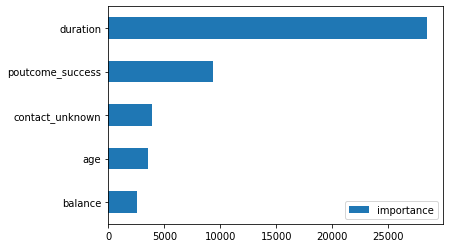

In [22]:
# lgbm.plot_importance(lgbm_model, max_num_features=5, figsize=(8, 6));

importance = lgbm_model.booster_.feature_importance(importance_type='gain')
feature_names = lgbm_model.feature_name_

importance_df = pd.DataFrame({'importance':importance}, index=feature_names)

importances=importance_df.sort_values(by='importance', ascending=True).tail(5)
importances.plot(kind='barh');
imp_factors['LGBMClassifier']=importances.sort_values(by='importance',ascending=False).head(5).index

### Cat Boost

In [23]:
cat = CatBoostClassifier(
#     iterations=200,
#     learning_rate=0.1,
#     depth=6,
#     random_seed=42,
    verbose=0
)
cat.fit(X_train, y_train)

add_score(roc_results,cat)

# y_pred = cat.predict(X_val)
# y_proba = cat.predict_proba(X_val)[:, 1]

# score = roc_auc_score(y_val, y_proba)
# print("ROC-AUC:", score)

ROC-AUC: 0.9345455276610604


,Model,Score
0,LogisticRegression(max_iter=5000),0.911404
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.929101
2,"XGBClassifier(base_score=None, booster=None, c...",0.931322
3,LGBMClassifier(random_state=42),0.933431
4,<catboost.core.CatBoostClassifier object at 0x...,0.934546


In [24]:
# model_list += 'RandomForest'
# roc_scores += score

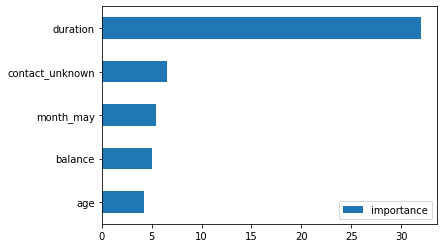

In [25]:
importance = cat.get_feature_importance()
feature_names = X_train.columns

importance_df = pd.DataFrame({'importance':importance}, index=feature_names)

importances=importance_df.sort_values(by='importance', ascending=True).tail(5)
importances.plot(kind='barh');
imp_factors['CatBoostClassifier']=importances.sort_values(by='importance',ascending=False).head(5).index

In [30]:
imp_factors

,LogisticRegression,DecisionTreeClassifier,XGBClassifier,LGBMClassifier,CatBoostClassifier
0,duration,duration,poutcome_success,duration,duration
1,poutcome_success,balance,contact_unknown,poutcome_success,contact_unknown
2,contact_cellular,age,month_mar,contact_unknown,month_may
3,month_jun,poutcome_success,duration,age,balance
4,month_mar,campaign,month_oct,balance,age


In [32]:
text='duration'

imp_factors.str.find(text)

AttributeError: 'DataFrame' object has no attribute 'str'

In [27]:
text='duration'
matching_indices = imp_factors.index[imp_factors.apply(lambda row: row.astype(str).str.contains(text, case=False).any(), axis=1)].tolist()
matching_indices

[0, 3]

In [28]:
for cat in X_train.columns:
    for row in imp_factors.rows:
        
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-28-0f3a61667f68>, line 5)

In [ ]:
plt.bar(result2['month'],result2['y_binary'])
plt.ylabel('% converted');

In [ ]:
forplotting = bfu['month'].value_counts()
forplotting=pd.DataFrame(forplotting.reset_index())
forplotting.sort_values(by='count', ascending=False)
plt.bar(forplotting['month'],forplotting['count']);

look at two sets - previously contacted vs not? 
check number of each